In [1]:
import py3Dmol
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import display
from ipyfilechooser import FileChooser

%matplotlib widget

def calculate_distance(coord1, coord2):
    return np.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2 + (coord2[2] - coord1[2])**2)


## Examples

In [2]:
def read_file():
    if fc.selected is not None:
        with open(fc.selected, 'r') as file:
            content = file.read()
        return content
    else:
        print("No file selected.")

fc = FileChooser()
display(fc)


FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [20]:
xyz = read_file()

In [21]:
xyz = '''59

O -5.301403 -2.601292 -0.500298
O -3.367214 -1.231646 -1.809521
O -4.379644 0.010097 0.793594
O -2.460089 -3.700719 -0.252618
Pb -3.419867 -1.845311 0.270488
O -3.472519 -2.458976 2.350497
O -1.538331 -1.089330 1.041273
O -2.550761 0.152413 3.644388
O -0.631206 -3.558404 2.598176
Pb -1.590983 -1.702995 3.121282
O -1.643635 -2.316661 5.201291
O 0.290553 -0.947014 3.892068
O -3.346703 0.952956 -3.947334
O -4.359133 2.194699 -1.344219
O -2.424945 3.564345 -2.653442
O -3.437375 4.806088 -0.050327
O -1.517820 1.095271 -1.096539
Pb -2.477597 2.950680 -0.573433
O -2.530250 2.337014 1.506576
O -0.596062 3.706661 0.197353
O -1.608492 4.948403 2.800468
O 0.311064 1.237587 1.754256
Pb -4.068581 1.247684 2.547849
Pb -0.648714 3.092995 2.277362
O -0.701366 2.479330 4.357371
O 1.232822 3.848976 3.048147
O 2.139947 1.379903 4.605050
O -2.139947 -1.379903 -4.605050
O -1.232822 -3.848976 -3.048147
O 0.701366 -2.479330 -4.357371
O -0.311064 -1.237587 -1.754256
O 1.608492 -4.948403 -2.800468
Pb 0.648714 -3.092995 -2.277362
O 0.596062 -3.706661 -0.197353
O 2.530250 -2.337014 -1.506576
O 1.517820 -1.095271 1.096539
O 3.437375 -4.806088 0.050327
Pb -0.942269 -4.795991 0.843921
Pb 2.477597 -2.950680 0.573433
O 2.424945 -3.564345 2.653442
O 4.359133 -2.194699 1.344219
O 3.346703 -0.952956 3.947334
O -0.290553 0.947014 -3.892068
O 1.643635 2.316661 -5.201291
O 0.631206 3.558404 -2.598176
O 2.550761 -0.152413 -3.644388
Pb -1.828884 -0.142316 -2.850795
Pb 1.590983 1.702995 -3.121282
O 1.538331 1.089330 -1.041273
O 3.472519 2.458976 -2.350497
O 2.460089 3.700719 0.252618
O 4.379644 -0.010097 -0.793594
Pb 0.000000 0.000000 0.000000
Pb 3.419867 1.845311 -0.270488
O 3.367214 1.231646 1.809521
O 5.301403 2.601292 0.500298
Pb 1.828884 0.142316 2.850795
Pb 0.942269 4.795991 -0.843921
Pp 4.068581 -1.247684 -2.547849
'''

In [22]:
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(xyz,'xyz',)
xyzview.setStyle({'stick':{'radius':.1, 'alpha':0.2, 'color':'gray'}, 
                  'sphere': {'radius':.3}
                  }
                 )

xyzview.addStyle({'atom': 'O'}, 
                 {'sphere': {'color': 'blue', 'radius': 0.3}})  

xyzview.addStyle({'atom': 'Pb'}, 
                 {'sphere': {'color': 'red', 'radius': 0.5}})  

xyzview.addStyle({'atom': 'Pp'}, 
                 {'sphere': {'color': 'yellow', 'radius': 0.5}})  


xyzview.setBackgroundColor('0xeeeeee')
xyzview.zoomTo()
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [23]:
compound = xyz.split('\n')[2:-1]
xyz_sorted = [compound[i].split(" ") for i in range(len(compound))]
elements = [xyz_sorted[i][0] for i in range(len(compound))]
coordinates = [np.array([float(xyz_sorted[i][1]),
                         float(xyz_sorted[i][2]), 
                         float(xyz_sorted[i][3])]) for i in range(len(compound))]

num_atoms = len(elements)
output = {"distance_all":[],
          "pairs_all":[]}
for i in range(num_atoms):
    atom_i = elements[i]
    for j in range(i + 1, num_atoms):
        atom_j = elements[j]
        distance = calculate_distance(coordinates[i], coordinates[j])
        output['distance_all'].append(distance)
        output['pairs_all'].append(f"{atom_i}-{atom_j}")
        print(f"{atom_i}-{atom_j}: {distance} Å")

O-O: 2.707597111234609 Å
O-O: 3.0566564529017652 Å
O-O: 3.0566567287356623 Å
O-Pb: 2.169284686124207 Å
O-O: 3.390000392527558 Å
O-O: 4.3385690169304665 Å
O-O: 5.685714086883459 Å
O-O: 5.685714073713961 Å
O-Pb: 5.262128445126458 Å
O-O: 6.77999990213171 Å
O-O: 7.3006497440416895 Å
O-O: 5.32311827041256 Å
O-O: 4.96000051201832 Å
O-O: 7.136183806928533 Å
O-O: 7.651558844446339 Å
O-O: 5.323117663638387 Å
O-Pb: 6.2292553441519 Å
O-O: 6.0078031218508645 Å
O-O: 7.900457068694886 Å
O-O: 9.029426473132277 Å
O-O: 7.163783325983974 Å
O-Pb: 5.062180011207523 Å
O-Pb: 7.860522530003333 Å
O-O: 8.400595718269866 Å
O-O: 9.8434503879724 Å
O-O: 9.863477158265688 Å
O-O: 5.323117893749959 Å
O-O: 4.9600001254252 Å
O-O: 7.13618403098841 Å
O-O: 5.323118008057871 Å
O-O: 7.651559382651747 Å
O-Pb: 6.229255221452561 Å
O-O: 6.007804068493828 Å
O-O: 7.90045739099813 Å
O-O: 7.163783217039652 Å
O-O: 9.029427126098588 Å
O-Pb: 5.062181115933921 Å
O-Pb: 7.8605223258321075 Å
O-O: 8.400595245904482 Å
O-O: 9.843450443733335

In [7]:
O_O = ['O-O']
Pb_O = ['Pb-O', 'O-Pb', 'Pp-O', 'O-Pp']
Pb_Pb = ['Pb-Pb', 'Pp-Pb']

pairs_sorted = {"O-O":[],
                "Pb-Pb":[],
                "Pb-O":[]}

for index, element in enumerate(output['pairs_all']):
    if element in O_O:
        pairs_sorted["O-O"].append(output['distance_all'][index])
    elif element in Pb_O:
        pairs_sorted["Pb-O"].append(output['distance_all'][index])
    elif element in Pb_Pb:
        pairs_sorted["Pb-Pb"].append(output['distance_all'][index])


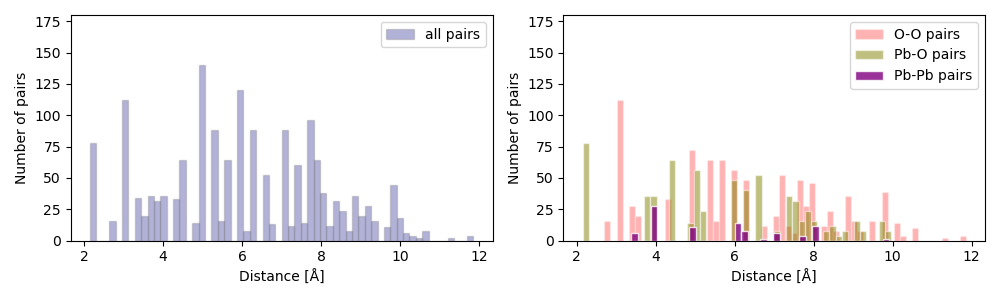

In [8]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(output['distance_all'], bins=60, color='navy', alpha=0.3,edgecolor='gray',label='all pairs')
plt.xlabel("Distance [Å]")
plt.ylabel("Number of pairs")
plt.ylim(0, 180)
plt.legend()

plt.subplot(122)
plt.hist(pairs_sorted["O-O"], bins=60, color='red', alpha=0.3, edgecolor='white', label='O-O pairs')
plt.hist(pairs_sorted["Pb-O"], bins=50, color='olive', alpha=0.5,edgecolor='white', label='Pb-O pairs')
plt.hist(pairs_sorted["Pb-Pb"], bins=40, color='purple', alpha=0.8,edgecolor='white',  label='Pb-Pb pairs')
plt.xlabel("Distance [Å]")
plt.ylabel("Number of pairs")
plt.legend()
plt.ylim(0, 180)
plt.tight_layout()

75/number of Pd num_atoms (coordinations )

1. CN of Pd atoms, CN of Oxygen
2. calculate radius of the cluster: longest distance from (0,0,0)
3. increase radius of the cluster, doesn't need to shrink/expand the bond lengths, chop the hist and calculate the CN again
4. cif file --> cluster, increase clusters

Display local file.

In [9]:
benz='''
     RDKit          3D

  6  6  0  0  0  0  0  0  0  0999 V2000
   -0.9517    0.7811   -0.6622 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2847    1.3329   -0.3121 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2365    0.5518    0.3512 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9517   -0.7811    0.6644 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2847   -1.3329    0.3144 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2365   -0.5518   -0.3489 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END
$$$$'''
view = py3Dmol.view(data=benz,
                    style={'stick':{'colorscheme':'cyanCarbon'}},
                    width=400,height=200
                    )
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You can create a single canvas object with multiple viewers arrayed in a grid (3Dmol.createViewerGrid).

In [10]:
view = py3Dmol.view(query='pdb:1dc9',linked=False,viewergrid=(2,2))
view.setViewStyle({'style':'outline','color':'black','width':0.1})
view.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}},viewer=(0,1))
view.setStyle({'stick':{'colorscheme':'greenCarbon'}},viewer=(1,0))
view.setStyle({'cartoon':{'color':'spectrum'}},viewer=(1,1))
view.removeAllModels(viewer=(0,0))
view.addModel(benz,'sdf',viewer=(0,0))
view.setStyle({'stick':{}},viewer=(0,0))
view.zoomTo(viewer=(0,0))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
view = py3Dmol.view(query='pdb:1ycr')
chA = {'chain':'A'}
chB = {'chain':'B'}
view.setStyle(chA,{'cartoon': {'color':'spectrum'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'white'}, chA)
view.setStyle(chB,{'stick':{}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
view = py3Dmol.view(query='pdb:5ire',options={'doAssembly':True})
view.setStyle({'cartoon':{'color':'spectrum'}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Color by temperature factors

In [13]:
view = py3Dmol.view(query='pdb:1ycr')
view.setStyle({'cartoon': {'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'colorscheme':{'prop':'b','gradient':'sinebow','min':0,'max':70}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
import requests, base64
r = requests.get('https://mmtf.rcsb.org/v1.0/full/5lgo')
view = py3Dmol.view()
view.addModel(base64.b64encode(r.content).decode(),'mmtf')
view.addUnitCell()
view.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Specifying individual styles for a viewer grid in the constructor

In [15]:
view = py3Dmol.view(query='pdb:1dc9',viewergrid=(2,2),style=[[{'stick':{}},{'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}}],
                                                            [{'stick':{'colorscheme':'greenCarbon'}},{'cartoon':{'color':'spectrum'}}]])
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

It isn't possible to convert Python functions to Javascript functions, but Javascript code can be provided in string form to click/hover callbacks.

In [16]:
v = py3Dmol.view(query="pdb:1ubq",style={'cartoon':{},'stick':{}})
v.setHoverable({},True,'''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.resn+":"+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}''',
               '''function(atom,viewer) {
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }''')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

An existing viewer can be modified from different cells with `update`

In [17]:
benz='''
     RDKit          3D

  6  6  0  0  0  0  0  0  0  0999 V2000
   -0.9517    0.7811   -0.6622 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2847    1.3329   -0.3121 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2365    0.5518    0.3512 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9517   -0.7811    0.6644 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2847   -1.3329    0.3144 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2365   -0.5518   -0.3489 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END
$$$$'''
view = py3Dmol.view()
view.addModel(benz,'sdf')
view.setStyle({'stick':{}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

However, **this does not work in colab** because colab sandboxes the JavaScript environments of each cell.

In [18]:
view.setStyle({'stick':{'color':'blue'}})
view.update()

In [19]:
p = py3Dmol.view(query='mmtf:1ycr')
p.setStyle({'cartoon': {'color':'spectrum'}})
p

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol